<h1>Projet d’outils et logiciels d’analyse de données</h1>

**DURIAUD Matéo**<br>
*N°2191262*<br>
*M1 MIASHS*

## 1- Découverte de la thématique

Dans le cadre de mon alternance dans l'entreprise SUEZ Eau France, je suis amené à analyser de nombreuses données ayant trait à l'eau. Le service auquel je suis rattaché est celui de la Télérelève qui consiste en l'installation d'émeteurs directement raccordés au compteur d'eau et permettant un suivi automatisé de la consommation. L'objectif est ainsi de permettre une meilleure estimation de la consommation réelle des usagés, une réduction des coûts en réduisant le besoin des interventions préventives et physiques avec des agents ainsi qu'une meilleure capacitéà repérer des mauvais fonctionnements tels que des fuites.<br>
Les principaux documents mis à ma disposition concerne donc les informations des clients ainsi que leurs données de consommation relevés avec un double objectif de repérage à la fois des incohérences de consommation (un pic de consommation important en hiver par exemple) mais aussi surtout afin de détecter des défaillances matérielles pouvant nécessiter des interventions de réparation.

Le document sur lequel je me suis basé pour ce travail est un état des lieux du parc de compteurs rattachés à mon service. Il permet donc d'avoir un grand nombre d'informations telles que le type d'équipement de chaque individu avec le diamètre ou le modèle, les dates d'installation et de maintenance ou encore le type d'accessibilité du compteur par exemple. Nous chercherons donc à déterminer de manière graphique si nous pouvons mettre en évidence certaines tendances à partir de ce document.

Nous commençons tout d'abord par importer les différentes librairies qui nous seront utiles afin de récupérer et visualiser nos données.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2- Encodage des données

<b><i>Attention : cette partie n'est pas excecutable sans le document d'origine qui ne peut pas être transmis pour des raisons de confidentialité. Elle n'est présente qu'à titre informatif pour permettre de comprendre les prétraitements effectués.</i></b>

Les données sur lesquelles j'ai travaillé étant des données sensibles et confidentielles, je ne pouvais pas mettre à disposition de manière libre ces dernières. Pour cette raison, je me suis chargé d'encoder manuellement les données sensibles telles que les lieux d'habitations mais aussi de supprimer celles qui n'avaient aucun intérêt dans le cadre de ce travail.

Le code suivant est donc fourni à titre indicatif mais je ne fourni pas le document d'origine avant codage pour des raisons évidentes de sécurité. Il est ainsi normal que ce qui suive soit en commentaires et non executable directement pour éviter une erreur de compilation à l'exécution.

In [2]:
df = pd.read_excel("Data_origine.xlsx")

Afin de confirmer la bonne importation de notre document, nous vérifions la taille ainsi que les premières lignes et nous les comparons au document d'origine via excel. Ici tout correspond mis à part le nombre de ligne car la première est celle des en-têtes et n'est donc pas comptée.

In [3]:
print(df.shape)

(28012, 87)


In [4]:
df.drop(df.columns[[3, 4, 5, 6, 7, 8, 18, 23, 25, 30, 32, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85]], axis = 1, inplace = True)

In [5]:
print(df.keys())

Index(['PB', 'CONTRAT_RATTACHEMENT', 'COMMUNE', 'ID_COMPTEUR', 'NUMERO_BADGE',
       'NUMERO_SERIE', 'FABRICANT', 'MODELE', 'DIAMETRE', 'ANNEE_FABRICATION',
       'SOLUTION_COMPACTE', 'SOLUTION_DEPORTEE', 'DATE_RECEPTION',
       'DATE_DEPOSE', 'MATRICULE_EQUIPEMENT', 'ACCESSIBLE',
       'LIBELLE_EMPLACEMENT', 'ID_PDS', 'DATE_MISE_EN_SERVICE_PDS', 'ETAT_PDS',
       'ETAT_SOURCE_PDS', 'LOGEMENT_VACANT', 'RACCORDE_RACORDABLE',
       'DATE_RACCORDABILITE', 'USAGE', 'FLUIDE', 'CALIBRE_BRANCHEMENT',
       'MODE_DE_RELEVE', 'ID_SITE', 'MENSUALISE', 'CLASSE_CLIENT',
       'DATE_DERNIERE_RELEVE', 'TYPE_RELEVE', 'TYPE_SITE', 'ID_ACTEUR'],
      dtype='object')


In [6]:
#Nous cherchons à déterminer les données ayant plus de 1000 itérations différentes. De cette manière, nous pouvons regarder les 
#données ayant trop de valeurs possibles pour être analysées par visualisation. Il apparait également qu'un certain nombre
#de ces paramètres sont en réalité des clés uniques ce qui sert uniquement d'identifiant mais n'apporte rien à une analyse.
#Nous supprimons alors ces différentes données à l'exception de celles contenant des dates.

for col in df.columns:
    if len(df[col].unique()) > 1000 and col != 'ANNEE_FABRICATION' and col != 'DATE_RECEPTION' and col != 'DATE_DEPOSE' and col != 'DATE_DERNIERE_RELEVE':
        print (col)
        df.drop([col], axis = 1, inplace = True)

ID_COMPTEUR
NUMERO_BADGE
NUMERO_SERIE
MATRICULE_EQUIPEMENT
ID_PDS
DATE_MISE_EN_SERVICE_PDS
DATE_RACCORDABILITE
ID_SITE
ID_ACTEUR


In [7]:
print(df.keys())

Index(['PB', 'CONTRAT_RATTACHEMENT', 'COMMUNE', 'FABRICANT', 'MODELE',
       'DIAMETRE', 'ANNEE_FABRICATION', 'SOLUTION_COMPACTE',
       'SOLUTION_DEPORTEE', 'DATE_RECEPTION', 'DATE_DEPOSE', 'ACCESSIBLE',
       'LIBELLE_EMPLACEMENT', 'ETAT_PDS', 'ETAT_SOURCE_PDS', 'LOGEMENT_VACANT',
       'RACCORDE_RACORDABLE', 'USAGE', 'FLUIDE', 'CALIBRE_BRANCHEMENT',
       'MODE_DE_RELEVE', 'MENSUALISE', 'CLASSE_CLIENT', 'DATE_DERNIERE_RELEVE',
       'TYPE_RELEVE', 'TYPE_SITE'],
      dtype='object')


In [8]:
commune = df['COMMUNE'].unique()
for x in range (len(commune)):
    if x < 26 :
        df['COMMUNE'].replace(commune[x], chr(97+x), inplace = True)
    else:
        df['COMMUNE'].replace(commune[x], chr(97+x-26) + chr(97+x-26), inplace = True)

In [9]:
fabricant = df['FABRICANT'].unique()
for x in range (len(fabricant)):
    if x < 26 :
        df['FABRICANT'].replace(fabricant[x], chr(97+x), inplace = True)
    else:
        df['FABRICANT'].replace(fabricant[x], chr(97+x-26) + chr(97+x-26), inplace = True)

In [10]:
modele = df['MODELE'].unique()

#Nous avons remarqué ici qu'il y avait un grand nombre de valeur possible donc nous adaptons le code chr pour qu'il reste
#lisible facilement même pour les plus grandes valeurs

for x in range (len(modele)):
    if x < 26 :
        df['MODELE'].replace(modele[x], chr(97+x), inplace = True)
    elif x < 52:
        df['MODELE'].replace(modele[x], chr(97+x-26) + chr(97+x-26), inplace = True)
    else:
        df['MODELE'].replace(modele[x], chr(97+x-52) + chr(97+x-52) + chr(97+x-52), inplace = True)

In [11]:
print(df['MODELE'].unique())

['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' 'aa' 'bb' 'cc' 'dd' 'ee' 'ff' 'gg' 'hh'
 'ii' 'jj' 'kk' 'll' 'mm' 'nn' 'oo' 'pp' 'qq' 'rr' 'ss' 'tt' 'uu' 'vv'
 'ww' 'xx' 'yy' 'zz' 'aaa']


In [12]:
df.to_excel(r'Data.xlsx', index = False)

## 3- Importation des données

Nous importons notre document nommé "Data"

In [13]:
df = pd.read_excel("Data.xlsx")

Nous remarquons que nous avons environ 28000 lignes et 26 attributs en colonne.

In [14]:
print(df.shape)

(28012, 26)


Nous visualisons les premières lignes afin de confirmer la bonne importation du document et pour avoir une première idée de la forme des données.

In [15]:
df.head(n=10)

,PB,CONTRAT_RATTACHEMENT,COMMUNE,FABRICANT,MODELE,DIAMETRE,ANNEE_FABRICATION,SOLUTION_COMPACTE,SOLUTION_DEPORTEE,DATE_RECEPTION,...,RACCORDE_RACORDABLE,USAGE,FLUIDE,CALIBRE_BRANCHEMENT,MODE_DE_RELEVE,MENSUALISE,CLASSE_CLIENT,DATE_DERNIERE_RELEVE,TYPE_RELEVE,TYPE_SITE
0,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,a,30.0,2020.0,Non,Non,2021-03-05,...,Raccordable raccordé,Chantier,Eau Froide,50.0,Télé-Relevé,NON,Professionnel,2022-06-13,Normal,99 -
1,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,b,15.0,2017.0,Non,Oui,2017-08-10,...,Raccordable raccordé,Normal,Eau Froide,50.0,Télé-Relevé,OUI,Particulier,2022-04-25,Normal,02 Appartement
2,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,b,15.0,2018.0,Non,Oui,2018-07-06,...,Raccordable raccordé,Normal,Eau Froide,50.0,Télé-Relevé,NON,Particulier,2022-06-08,Estimation système,99 -
3,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,a,15.0,2021.0,Non,Oui,2022-02-04,...,Raccordable raccordé,Normal,Eau Froide,40.0,A pied,NON,Particulier,2022-05-03,Normal,03 Immeuble d'habitation
4,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,a,15.0,2019.0,Non,Oui,2020-09-14,...,Raccordable raccordé,Normal,Eau Froide,40.0,Télé-Relevé,OUI,Particulier,2022-04-25,Normal,03 Immeuble d'habitation
5,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,b,15.0,2017.0,Non,Oui,2018-03-05,...,Raccordable raccordé,NaN,NaN,25.0,Télé-Relevé,NON,Particulier,2022-04-25,Normal,02 Appartement
6,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,a,15.0,2021.0,Non,Oui,2021-10-20,...,Raccordable raccordé,Normal,Eau Froide,50.0,Télé-Relevé,NON,Particulier,2022-04-25,Normal,99 -
7,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,a,15.0,2019.0,Non,Oui,2020-02-04,...,Raccordable raccordé,Normal,Eau Froide,50.0,Télé-Relevé,OUI,Particulier,2022-04-25,Normal,03 Immeuble d'habitation
8,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,b,15.0,2017.0,Non,Oui,2017-04-12,...,Raccordable raccordé,Normal,Eau Froide,50.0,Télé-Relevé,NON,Particulier,2022-04-25,Normal,02 Appartement
9,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,b,15.0,2017.0,Non,Oui,2017-10-05,...,Raccordable raccordé,Normal,Eau Froide,50.0,Télé-Relevé,NON,Particulier,2022-06-08,Estimation système,02 Appartement


In [16]:
#Supprime les lignes entièrements vides qui seraient inutiles s'il y en a
df.dropna(how='all', inplace=True)

#Supprime s'il existe des lignes exactements similaires (normalement impossible à cause des codes de références)
df.drop_duplicates(keep='first')

,PB,CONTRAT_RATTACHEMENT,COMMUNE,FABRICANT,MODELE,DIAMETRE,ANNEE_FABRICATION,SOLUTION_COMPACTE,SOLUTION_DEPORTEE,DATE_RECEPTION,...,RACCORDE_RACORDABLE,USAGE,FLUIDE,CALIBRE_BRANCHEMENT,MODE_DE_RELEVE,MENSUALISE,CLASSE_CLIENT,DATE_DERNIERE_RELEVE,TYPE_RELEVE,TYPE_SITE
0,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,a,30.0,2020.0,Non,Non,2021-03-05,...,Raccordable raccordé,Chantier,Eau Froide,50.0,Télé-Relevé,NON,Professionnel,2022-06-13,Normal,99 -
1,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,b,15.0,2017.0,Non,Oui,2017-08-10,...,Raccordable raccordé,Normal,Eau Froide,50.0,Télé-Relevé,OUI,Particulier,2022-04-25,Normal,02 Appartement
2,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,b,15.0,2018.0,Non,Oui,2018-07-06,...,Raccordable raccordé,Normal,Eau Froide,50.0,Télé-Relevé,NON,Particulier,2022-06-08,Estimation système,99 -
3,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,a,15.0,2021.0,Non,Oui,2022-02-04,...,Raccordable raccordé,Normal,Eau Froide,40.0,A pied,NON,Particulier,2022-05-03,Normal,03 Immeuble d'habitation
4,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,a,a,a,15.0,2019.0,Non,Oui,2020-09-14,...,Raccordable raccordé,Normal,Eau Froide,40.0,Télé-Relevé,OUI,Particulier,2022-04-25,Normal,03 Immeuble d'habitation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28006,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,m,a,b,15.0,2016.0,Non,Oui,2017-03-01,...,Non Raccordable,Normal,Eau Froide,32.0,A pied,OUI,Particulier,2022-09-13,Vérifié,02 Appartement
28007,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,m,e,o,15.0,2007.0,Non,Oui,2007-05-09,...,Non Raccordable,Normal,Eau Froide,40.0,A pied,NON,Particulier,2022-08-04,Normal,02 Appartement
28009,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,m,e,h,15.0,2000.0,Non,Non,2000-08-01,...,Raccordable raccordé,Normal,Eau Froide,32.0,A pied,NON,Particulier,2022-08-05,Normal,02 Appartement
28010,PB PH PS SIDESOL ER RAA,SUD OUEST LYONNAIS - 24309,m,a,a,15.0,2021.0,Non,Oui,2021-11-02,...,Raccordable raccordé,Normal,Eau Froide,25.0,A pied,NON,Particulier,2022-07-22,Relevé client,02 Appartement


In [17]:
df.shape

(28012, 26)

Aucune ligne n'a été supprimée donc elles ont toutes au moins un élément non vide.

## 4- Découverte des données

Nous cherchons désormais à déterminer la composition de nos différentes colonnes

In [18]:
#Affiche une description du DataFrame ce qui permet de connaitre le nombre de lignes et de colonnes après traitement ainsi que le nombre de variables numériques
#Nous remarquons ainsi que dans nos 87 colonnes nous avons une majorité d'object (donc des strings) mais également des entiers, des réels et quelques dates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   PB                    28012 non-null  object        
 1   CONTRAT_RATTACHEMENT  28012 non-null  object        
 2   COMMUNE               28012 non-null  object        
 3   FABRICANT             28012 non-null  object        
 4   MODELE                28012 non-null  object        
 5   DIAMETRE              27795 non-null  float64       
 6   ANNEE_FABRICATION     27993 non-null  float64       
 7   SOLUTION_COMPACTE     27816 non-null  object        
 8   SOLUTION_DEPORTEE     27816 non-null  object        
 9   DATE_RECEPTION        28012 non-null  datetime64[ns]
 10  DATE_DEPOSE           196 non-null    datetime64[ns]
 11  ACCESSIBLE            28012 non-null  object        
 12  LIBELLE_EMPLACEMENT   27932 non-null  object        
 13  ETAT_PDS        

Nous pouvons remarquer que la majorité de nos attributs sont au moins en grande partie remplis de valeur non nulles mis à part celle de la date de dépose. Il est probable que nous ne pourrons donc pas utiliser cette valeur par la suite.

In [19]:
print(df.keys())

Index(['PB', 'CONTRAT_RATTACHEMENT', 'COMMUNE', 'FABRICANT', 'MODELE',
       'DIAMETRE', 'ANNEE_FABRICATION', 'SOLUTION_COMPACTE',
       'SOLUTION_DEPORTEE', 'DATE_RECEPTION', 'DATE_DEPOSE', 'ACCESSIBLE',
       'LIBELLE_EMPLACEMENT', 'ETAT_PDS', 'ETAT_SOURCE_PDS', 'LOGEMENT_VACANT',
       'RACCORDE_RACORDABLE', 'USAGE', 'FLUIDE', 'CALIBRE_BRANCHEMENT',
       'MODE_DE_RELEVE', 'MENSUALISE', 'CLASSE_CLIENT', 'DATE_DERNIERE_RELEVE',
       'TYPE_RELEVE', 'TYPE_SITE'],
      dtype='object')


In [20]:
#Je regarde à titre d'exemple les premières colonnes et remarque qu'elles n'ont qu'une seule valeur ce qui indique qu'elles ne sont ici pas nécessaires
print(df['PB'].unique())
print(df['CONTRAT_RATTACHEMENT'].unique())

['PB PH PS SIDESOL ER RAA']
['SUD OUEST LYONNAIS - 24309']


In [21]:
#Je confirme la bonne détection du nombre d'éléments de la première colonne
print (len(df['PB'].unique()))

1


In [22]:
#Au lieu de supprimer chaque colonne manuellement à l'aide de la commande drop j'utilise une boucle sur l'ensemble des données.
#Cela me permet d'être sur de ne pas rater de colonne

#df = df.drop (
#    labels = ['PB', 'CONTRAT_RATTACHEMENT'],
#    axis = 1
#)

for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col, inplace = True, axis = 1)

In [23]:
#Je regarde la liste des colonnes ayant uniquement deux attributs possibles.
#Dans le cas où il existe une valeur null (= nan) je vérifie l'intérêt de transformer en désignant une valeur ou de supprimer la colonne

for col in df.columns:
    if len(df[col].unique()) == 2:
        print (df[col].unique())
        print (col)

['Ouvert' 'Fermé']
ETAT_SOURCE_PDS
['NON' 'OUI']
LOGEMENT_VACANT
['NON' 'OUI']
MENSUALISE


Ici nous remarquons que sur les 3 variables qu'il nous reste, aucune ne propose de valeur manquante. Nous n'allons donc pas avoir besoin de chercher à remplacer ou supprimer les valeurs en "nan" ce qui est une bonne nouvelle.

Nous avons ensuite utilisé un nouveau dataFrame nommé "df_reduit" dans lequel nous ne conservons que les champs n'ayant aucune valeur nulles. Dans le cadre d'une analyse avec des traitements statistiques poussés, nous pourrions conserver les autres attributs en essayant de déterminer une utilisation optimale de ces derniers.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   COMMUNE               28012 non-null  object        
 1   FABRICANT             28012 non-null  object        
 2   MODELE                28012 non-null  object        
 3   DIAMETRE              27795 non-null  float64       
 4   ANNEE_FABRICATION     27993 non-null  float64       
 5   SOLUTION_COMPACTE     27816 non-null  object        
 6   SOLUTION_DEPORTEE     27816 non-null  object        
 7   DATE_RECEPTION        28012 non-null  datetime64[ns]
 8   DATE_DEPOSE           196 non-null    datetime64[ns]
 9   ACCESSIBLE            28012 non-null  object        
 10  LIBELLE_EMPLACEMENT   27932 non-null  object        
 11  ETAT_SOURCE_PDS       28012 non-null  object        
 12  LOGEMENT_VACANT       28012 non-null  object        
 13  RACCORDE_RACORDA

In [25]:
df_reduit = df.dropna (axis = 1)

Nous pouvons voir que nous avons supprimer 12 colonnes ce qui fait qu'il nous en reste 11 désormais.

In [26]:
df_reduit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   COMMUNE               28012 non-null  object        
 1   FABRICANT             28012 non-null  object        
 2   MODELE                28012 non-null  object        
 3   DATE_RECEPTION        28012 non-null  datetime64[ns]
 4   ACCESSIBLE            28012 non-null  object        
 5   ETAT_SOURCE_PDS       28012 non-null  object        
 6   LOGEMENT_VACANT       28012 non-null  object        
 7   MODE_DE_RELEVE        28012 non-null  object        
 8   MENSUALISE            28012 non-null  object        
 9   DATE_DERNIERE_RELEVE  28012 non-null  datetime64[ns]
 10  TYPE_SITE             28012 non-null  object        
dtypes: datetime64[ns](2), object(9)
memory usage: 2.4+ MB


## 5- Analyse

Nous commençons par étudier les colonnes dans l'ordre de leur apparition. La première correspond à la commune et est intéressante pour nous permettre de prendre conscience de la répartition des données. Nous pouvons voir que nous avons 13 communes différentes et que celle la plus représentée est celle de a. Il s'agit de la commune principale qui est rattachée au secteur ce qui est donc très cohérent. Les communes de b et m sont également des contrats assez massifs ce qui explique leur importance dans le total contrairement à d et e qui sont des contrats plus récents et avec une population plus faible.

13


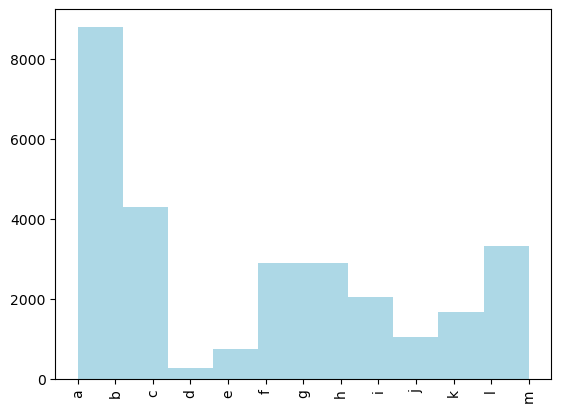

In [27]:
print (len(df_reduit['COMMUNE'].unique()))
plt.hist(df_reduit['COMMUNE'], color = 'lightblue')
plt.xticks(rotation='vertical')

plt.show()

Nous remarquons dans le document d'origine que la majorité du matériel provient du même fabricant. Il s'agit d'un fournisseur de matériel professionnel et nous pouvons supposer que pour des raisons historiques, de prix ou de choix il s'agit d'une solution favorisée par l'entreprise pour son approvisionnement.

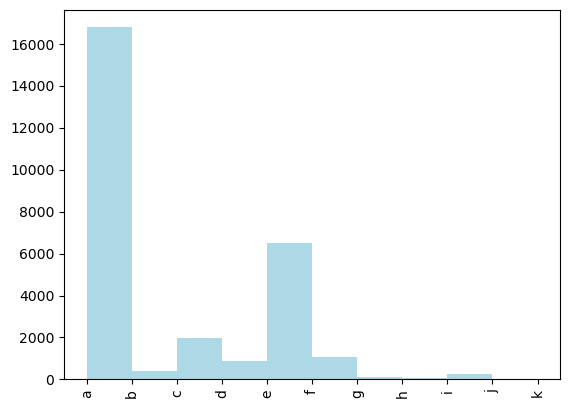

In [28]:
plt.hist(df_reduit['FABRICANT'], color = 'lightblue')
plt.xticks(rotation='vertical')

plt.show()

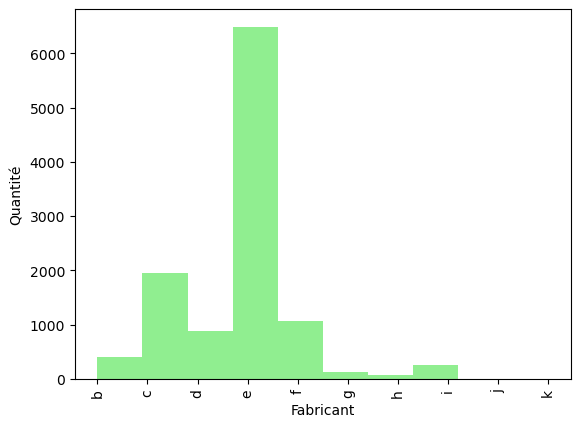

In [29]:
#Nous cherchons à obtenir une visualisation plus précise pour les petites valeurs en supprimant 'a' qui représente
#la majorité de nos données.
test = df_reduit[df_reduit.FABRICANT != 'a']

plt.hist(test['FABRICANT'], color = 'lightgreen')
plt.xticks(rotation='vertical')
plt.xlabel('Fabricant')
plt.ylabel('Quantité')

plt.show()

Nous avons pu remarquer que certains fabricants sont bien plus présents que d'autres ce qui peut s'expliquer à la fois par des capacités différentes des fournisseurs mais également par l'organisation des contrats.

A l'aide du nuage de point suivant, nous avons essayé de déterminer une corrélation entre les dates de fabrication des différennts produits et les fabricants. Cela peut nous permettre de mettre en valeur l'existence historique de certains fournisseurs mais également de potentielles évolutions dans les contrats.<br>
Grâce à cela nous pouvons par exemple remarquer que le fournisseur a qui est celui ayant produit la plus grande quantité n'est présent que depuis 2010 dans les données dont nous disposons. A l'aide de cette information nous pouvons supposer que la plus grande partie des installations de matériel ont eu lieu depuis une dizaine d'année puisque le fabricant majoritaire n'était pas présent auparavant. Nous pourrions chercher à déterminer la véracité de cette hypothèse en allant sur le terrain mais elle semble juste car les données concernent principalement les éméteurs radio qui ne sont installés que depuis une quinzaine d'années.<br>
De la même manière, nous pouvons remarquer que certains fournisseurs tels que le c, le e ou encore le h ont eu des périodes d'activité mais ne sont plus utilisés sur le terrain. Il pourrait ainsi être intéressant dans une analyse plus poussé de se pencher sur une explication. Nous pouvons imaginer que ces fabricants ne produisent plus les équipements nécessaires ou on fait faillite par exemple mais encore que pour diverses raisons économiques l'entreprise SUEZ a fait le choix de ne plus faire appel à eux.

Ici nous avons souhaité réutiliser le dataframe original afin d'avoir accès à la date de fabrication.

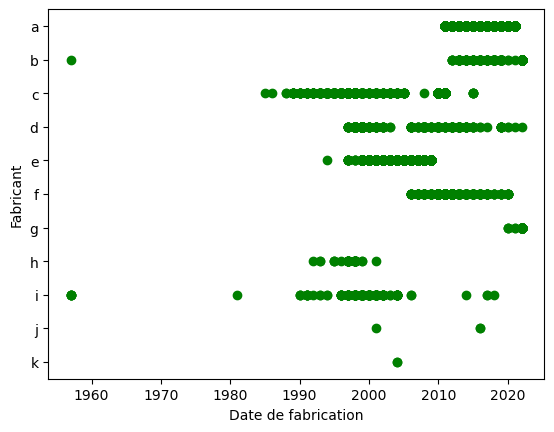

In [30]:
x_date = df['ANNEE_FABRICATION']
y_fabr = df['FABRICANT']

plt.plot(x_date, y_fabr, "og")
plt.xlabel('Date de fabrication')
plt.ylabel('Fabricant')
#Nous inversons l'axe des ordonnés afin d'avoir une meilleure lisibilité de bas en haut.
plt.gca().invert_yaxis()

plt.show()

Nous regardons si nous parvenons à déterminer une logique entre les communes d'installation et les fabricants de matériel. Il semblerait que les fabricants k et j n'aient été installés que dans 2 communes contrairement à la majorité des autres fabricants qui sont répartis sur une part importante des communes. Nous remarquons par exemple que les communes ayant reçu du matériel venant des fabricants j et k ont tous également du matériel venant de l'ensemble des autres fabricants.

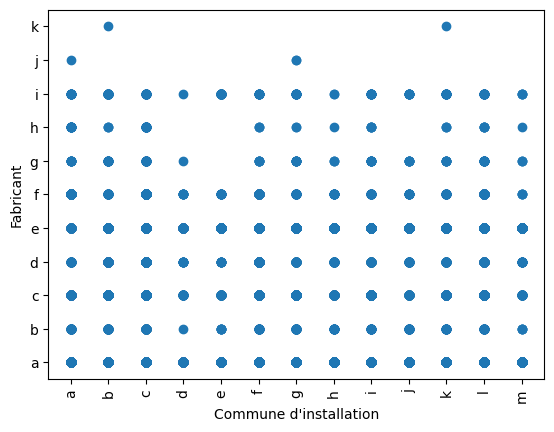

In [31]:
x_lieu = df_reduit['COMMUNE']

plt.plot(x_lieu, y_fabr, 'o')
plt.xticks(rotation='vertical')
plt.xlabel("Commune d'installation")
plt.ylabel('Fabricant')

plt.show()

Nous avons par la suite chercher à déterminer si nous pouvons remarquer une corrélation à l'aide d'une heatmap. Il est tout à fait normal d'avoir une corrélation de 1 (c'est à dire complète) sur les cases de la diagonale puisqu'il s'agit de la corrélation entre la variable et elle même. Nous voyons qu'il existe une légère corrélation entre le diamètre du compteur et le calibre du branchement ce qui est relativement logique puisque de manière générale un diamètre plus important indique un débit plus grand également qui va donc nécessiter un branchement suffisant. Il pourrait être intéressant de se pencher sur des corrélations plus précises à l'aide de modèles statistiques.

In [32]:
df.corr()

,DIAMETRE,ANNEE_FABRICATION,CALIBRE_BRANCHEMENT
DIAMETRE,1.000000,0.020694,0.337224
ANNEE_FABRICATION,0.020694,1.000000,0.146760
CALIBRE_BRANCHEMENT,0.337224,0.146760,1.000000


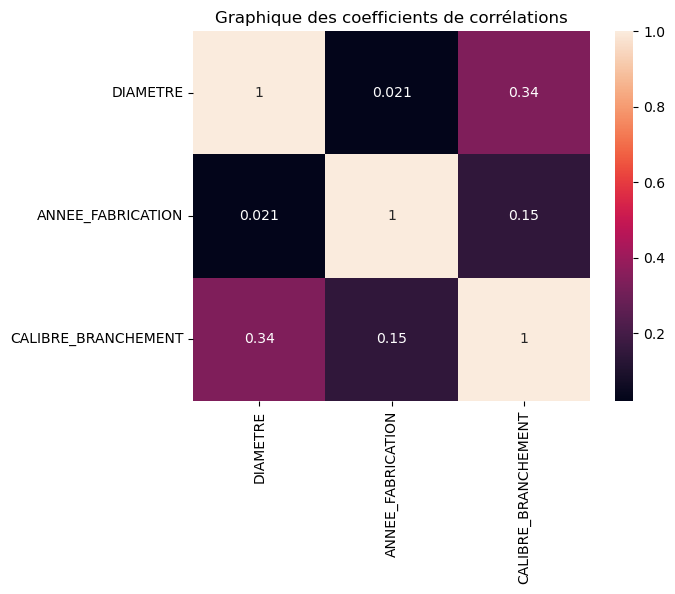

In [33]:
sns.heatmap(df.corr(), annot = True)
plt.title('Graphique des coefficients de corrélations')
plt.show()

Nous traçons à nouveau la même matrice mais cette fois à partir d'un graphique supprimant les valeurs de la diagonale et reprenant des couleurs allant de -1 à 1 c'est à dire les bornes possibles du coefficient de corrélation.

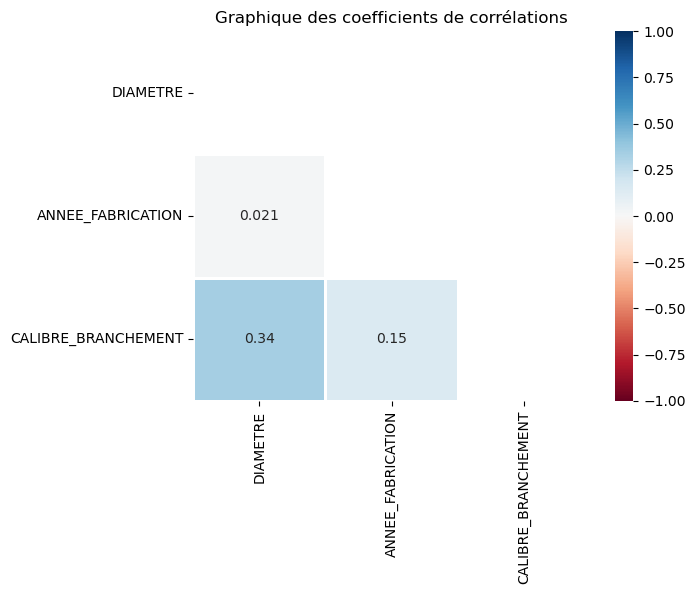

In [34]:
mask = np.triu(np.ones_like(df.corr(), dtype = bool))

sns.heatmap(df.corr(), mask = mask, center = 0, cmap = 'RdBu', linewidths = 1, annot = True, vmin = -1, vmax = 1)
plt.title('Graphique des coefficients de corrélations')
plt.show()

Nous réutilisons à nouveau le dataframe d'origine afin de visualiser la répartition des diamètres. Les données vides dans les diamètres sont assez peu nombreuses donc on peut supposer que cela provient avant tout d'erreurs lors de l'enregistrement des informations dans la base de données par les agents sur le terrain.

Nous pouvons remarquer que la grande majorité des diamètres des compteurs semble être de 15 (en cm) ce qui est cohérent puisqu'il s'agit du diamètre standard pour des canalisations d'habitations. Les diamètres les plus gros sont ceux que l'on retrouve pour les collectivités ou les batiments professionnels ce qui explique qu'ils soient moins nombreux.

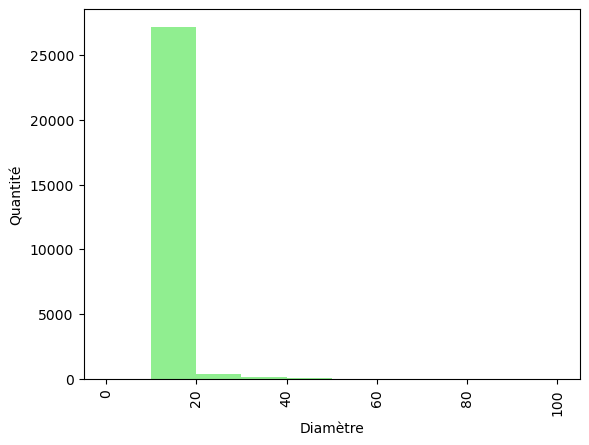

In [35]:
plt.hist(df['DIAMETRE'], color = 'lightgreen')
plt.xticks(rotation='vertical')
plt.xlabel('Diamètre')
plt.ylabel('Quantité')

plt.show()

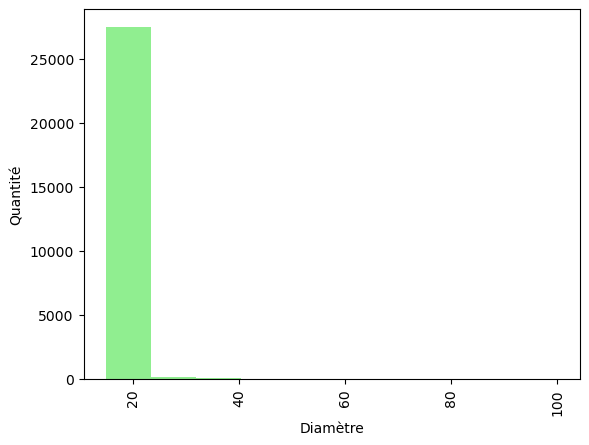

In [36]:
#Après vérification, il y a uniquement 2 individus ayant un diamètre renseigné de 0 et il s'agit de données corrompues et donc
#inutilisables. Nous pouvons ainsi supprimer ces valeurs et essayer de visualiser à nouveau le graphique.
df_reduit = df[df.DIAMETRE != 0]

plt.hist(df_reduit['DIAMETRE'], color = 'lightgreen')
plt.xticks(rotation='vertical')
plt.xlabel('Diamètre')
plt.ylabel('Quantité')

plt.show()

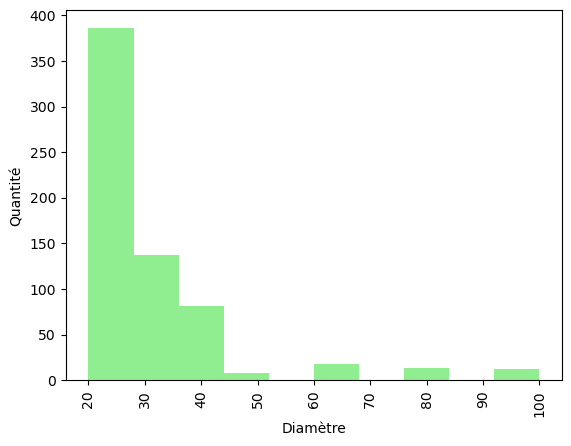

In [37]:
#Nous visualisons les valeurs les plus petites afin de déterminer la répartition et effectivement, de manière assez logique,
#les valeurs les plus répandues sont les plus petits diamètre et plus nous augmentons la taille, plus la quantité semble diminuer.
test = df_reduit[df_reduit.DIAMETRE != 15]

plt.hist(test['DIAMETRE'], color = 'lightgreen')
plt.xticks(rotation='vertical')
plt.xlabel('Diamètre')
plt.ylabel('Quantité')

plt.show()

Même si cela semble assez peu probable, nous essayons de voir s'il existe une cohérence apparente entre les diamètres des conduites et leur date de réception (en supposant ici que la date d'installation est raisonnablement proche de celle de réception). Comme nous pouvions l'imaginer, il n'existe aucune relation visible entre ces élements et tout les diamètres semblent avoir été utilisés à toutes les périodes. Il est intéressant de remarquer cependant que les canalisations les plus imposantes sont installées moins souvent ce qui est tout à fait logique puisqu'il s'agit généralement de travaux important lors de la construction de batiments.

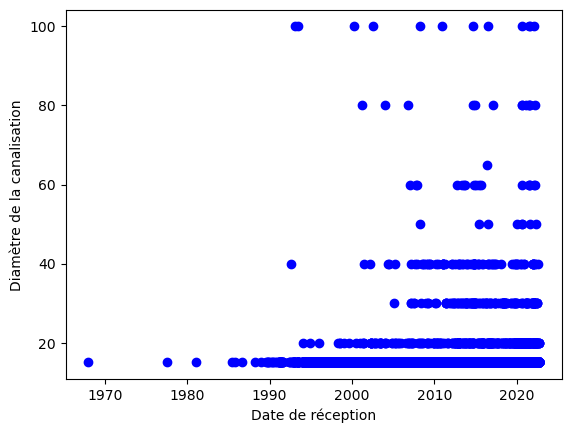

In [38]:
x_date = df_reduit['DATE_RECEPTION']
y_fabr = df_reduit['DIAMETRE']

plt.plot(x_date, y_fabr, "ob")
plt.xlabel('Date de réception')
plt.ylabel('Diamètre de la canalisation')

plt.show()

Dans le jeu de données, nous retrouvons un attribut concernant l'accessibilité. Il s'agit d'un critère qui s'appuie sur le fait qu'un compteur soit librement accessible en étant en bord de route ou inaccessible en étant dans le jardin fermé d'une maison par exemple. Nous remarquons ainsi que nous avons une majorité des compteurs relevés ici qui sont considérés comme inaccessibles.

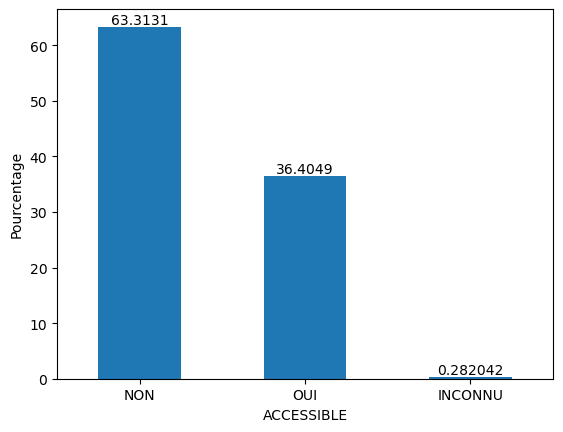

In [39]:
graph_df = (df_reduit.groupby('ACCESSIBLE').size().sort_values(ascending=False) / df_reduit.groupby('ACCESSIBLE').size().sort_values(ascending=False).sum())*100
    
ax = graph_df.plot(kind='bar')
    
ax.bar_label(ax.containers[0])
plt.ylabel('Pourcentage')
plt.xticks(rotation='horizontal')

plt.show()

Afin d'obtenir une description plus précise de l'accessibilité, nous pouvons nous appuyer sur les différents libellés fournis dans le document. Ainsi, nous avons par exemple une grande majorié de jardin qui sont considérés comme non accessibles, c'est à dire probablement dans une habitation fermée. Nous avons ensuite près de 25% d'accessibles qui correspondent aux trottoirs. C'Ces deux catégories sont clairement les plus répandues au moment des installations et nous pouvons voir que leur répartition majoritaire se retrouve également ici.

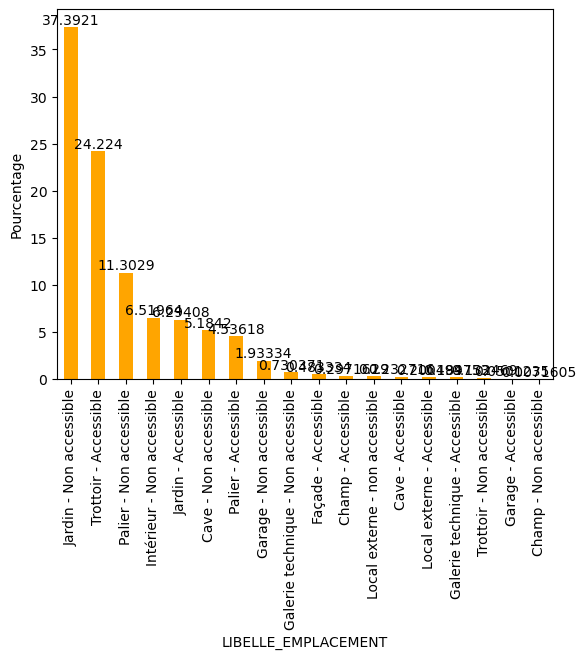

In [40]:
graph_df = (df_reduit.groupby('LIBELLE_EMPLACEMENT').size().sort_values(ascending=False) / df_reduit.groupby('LIBELLE_EMPLACEMENT').size().sort_values(ascending=False).sum())*100
    
ax = graph_df.plot(kind='bar', color = 'orange')
    
ax.bar_label(ax.containers[0])
plt.ylabel('Pourcentage')
plt.xticks(rotation='vertical')

plt.show()

Nous pouvons trouver une confirmation de notre hypothèse précédente selon laquelle la plupart des individus sont des particuliers et non des professionnels. Il apparait que plus de 91% des individus de notre échantillon sont des particuliers ce qui rejoins à la fois le diamètre plus petit des canalisations et le fait d'avoir de nombreux regardes non accessibles dans des jardin, des palliers ou des caves ce qui est bien plus courant chez des particuliers.

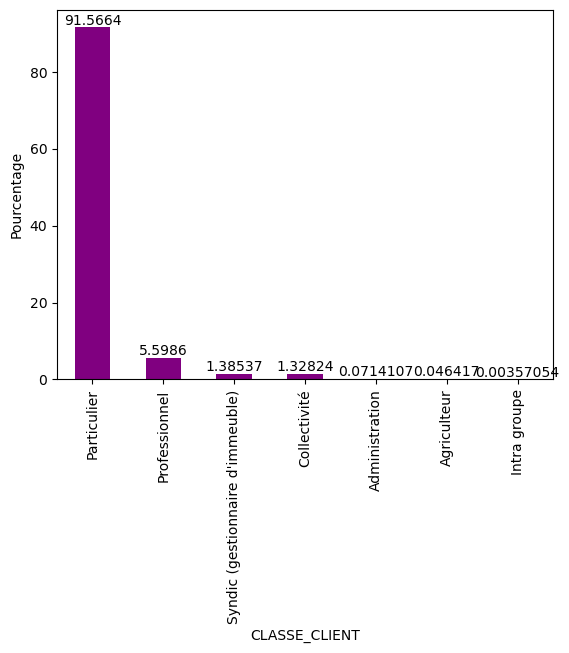

In [41]:
graph_df = (df_reduit.groupby('CLASSE_CLIENT').size().sort_values(ascending=False) / df_reduit.groupby('CLASSE_CLIENT').size().sort_values(ascending=False).sum())*100
    
ax = graph_df.plot(kind='bar', color = 'purple')
    
ax.bar_label(ax.containers[0])
plt.ylabel('Pourcentage')
plt.xticks(rotation='vertical')

plt.show()

Dans le cadre du travail dans mon service, nous nous intérrogeons souvent sur le niveau de déploiement de la télé-relève qui correspond à notre taux de couverture sur le territoire. Nous pouvons voir que sur l'ensemble du territoire concerné par nos données, cette couverture représente près de 20% du total ce qui n'est pas incohérent en sachant que cette technilogie est encore assez récente et en cours de déploiement.

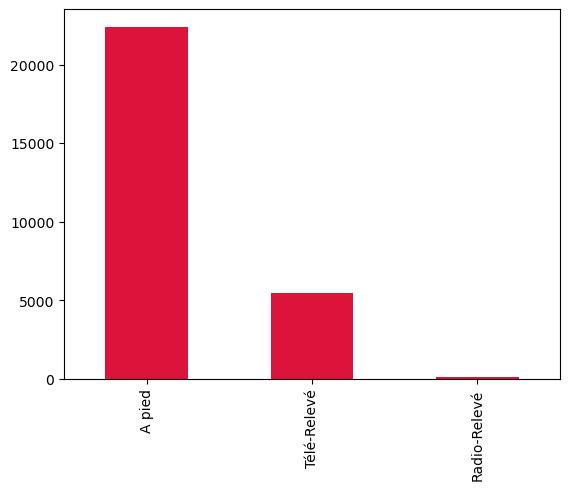

In [42]:
df_reduit.MODE_DE_RELEVE.value_counts().plot(kind='bar', color = 'crimson');

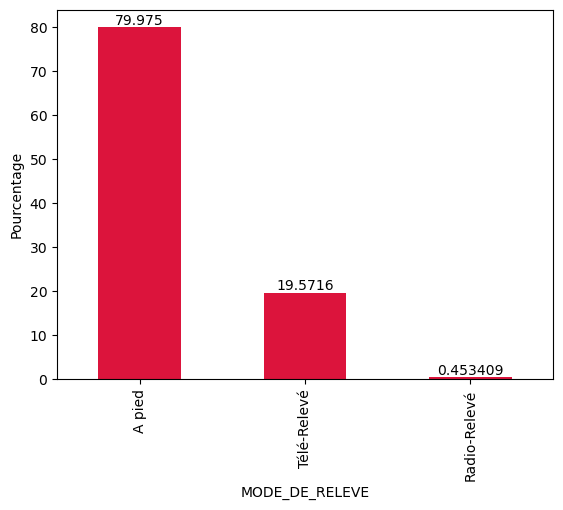

In [43]:
graph_df = (df_reduit.groupby('MODE_DE_RELEVE').size().sort_values(ascending=False) / df_reduit.groupby('MODE_DE_RELEVE').size().sort_values(ascending=False).sum())*100
    
ax = graph_df.plot(kind='bar', color = 'crimson')
    
ax.bar_label(ax.containers[0])
plt.ylabel('Pourcentage')
plt.xticks(rotation='vertical')

plt.show()

En essayant de visualiser la répartition des dates de réception selon les années de fabrication nous pouvons mettre en évidence certaines données abhérantes. En effet, il apparait que nous avons quelques données qui auraient été reçus avant leur année de fabrication. Nous pouvons également supposer que dans le cadre des compteurs ayant été frabriqués avant 1960 et reçu en 2000 ou plus tard nous sommes également face à des incohérences. Ces valeurs viennent probablement d'erreurs d'encodage ou d'informations corrompues. Dans le cadre d'une analyse statistique, ces données devrait donc naturellement être supprimées ou au minimum mise de côté.

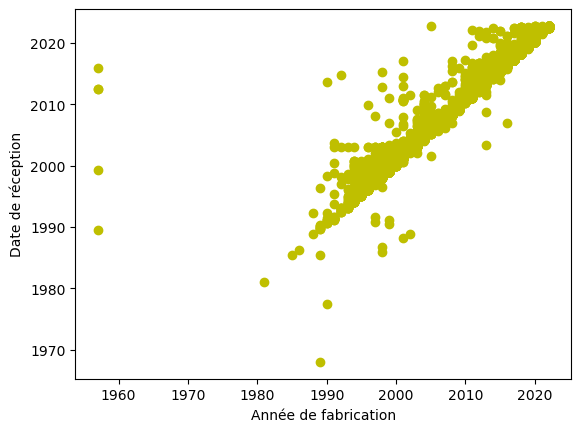

In [44]:
plt.plot(df_reduit['ANNEE_FABRICATION'], df_reduit['DATE_RECEPTION'], 'oy')

plt.xlabel('Année de fabrication')
plt.ylabel('Date de réception')

plt.show()

La colonne concernant la solution déportée est uniquement un booléen décrivant l'émetteur déjà installé au niveau du compteur d'eau. Dans cette situation, il indique s'il serait possible dans le cas ou ce serait nécessaire, d'installer un émetteur déporté qui permettrait une meilleure transmission des informations en étant positionné à un endroit plus favorable. Il s'agit d'une variable importante puisque dans le cas ou ce n'est pas possible (heureusement uniquement 12% de l'échantillon) en cas de difficulté de transmission il n'y aurait pas réellement de solution disponible.

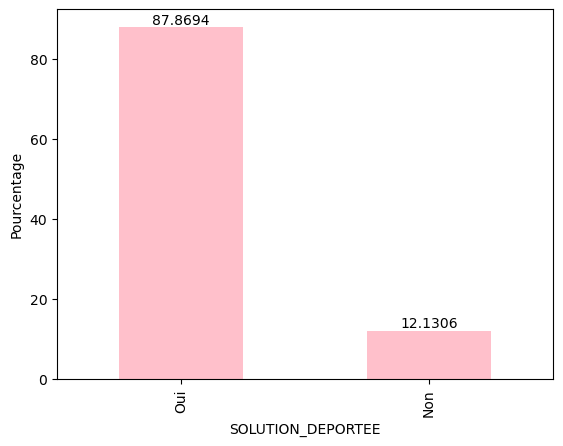

In [45]:
graph_df = (df_reduit.groupby('SOLUTION_DEPORTEE').size().sort_values(ascending=False) / df_reduit.groupby('SOLUTION_DEPORTEE').size().sort_values(ascending=False).sum())*100
    
ax = graph_df.plot(kind='bar', color = 'pink')
    
ax.bar_label(ax.containers[0])
plt.ylabel('Pourcentage')
plt.xticks(rotation='vertical')

plt.show()

Nous pouvons également confirmer l'activité principale de l'entreprise puisque plus de 99% de son activité concerne l'eau et plus spécifiquement l'eau froide. L'eau chaude ne représente qu'une partie extrêmement minime puisque de manière générale ce sont les particuliers ou les entreprises qui chauffent eux même l'eau froide qu'ils reçoivent afin de librement contrôler la quantité et la température par exemple.

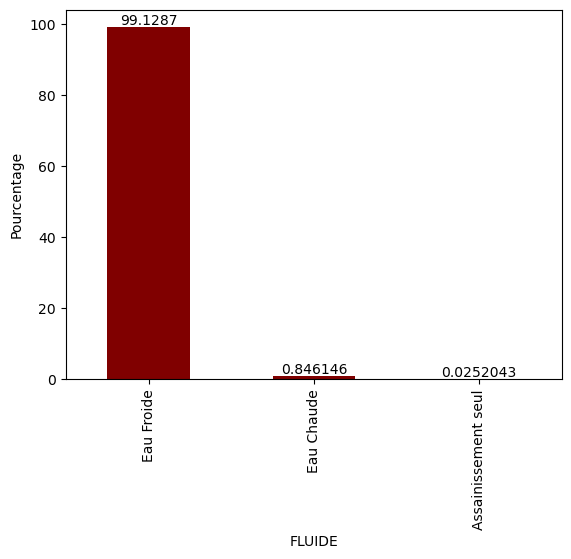

In [46]:
graph_df = (df_reduit.groupby('FLUIDE').size().sort_values(ascending=False) / df_reduit.groupby('FLUIDE').size().sort_values(ascending=False).sum())*100
    
ax = graph_df.plot(kind='bar', color = 'maroon')
    
ax.bar_label(ax.containers[0])
plt.ylabel('Pourcentage')
plt.xticks(rotation='vertical')

plt.show()

## 5- Conclusion

En conclusion, nous avons pu voir que le jeu de données à notre disposition peut tout à fait être iontéressant dans le cadre d'une analyse statistique afin de chercher à construire un modèle de prédiction ou de classification par exemple. Grâce aux différentes visualisations ci-dessus, nous avons eu une première approche de la construction de nos données et surtout nous avons pu mieux comprendre la construction de notre jeu de données. Un grand nombre d'axes d'études seraient possibles mais nous pouvons d'hors et déjà essayer de faire apparaitre des thématiques intéressantes pour un travail futur.<br>
Chercher à prédire le type d'emplacement et par extension l'accessibilité selon la commune et la classe du client pourrait par exemple être un bon moyen de chercher un modèle d'apprentissage.

La visualisation de données telle que présenté dans ce document est une étape primordiale avant toute étude poussée sur un jeu de données. Grâce aux graphiques et autres représentations que nous avons pu voir, nous avons déjà une bonne perception de la construction de nos données ce qui permet d'orienter des recherches et d'avoir des premières idées insctinctives des phénomènes existants en réalité. Ce travail de première approche nous aura permis de réfléchir sur la répartition géographique des compteurs d'eau mais également sur l'historique qui peut exister envers différents fournisseurs ou encore sur la répartition des différents émetteurs.